In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("hourly completed.csv", parse_dates=True)

In [3]:
df

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,5.038240,0,7.819507,197.011914,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,6.829040,0,0.886376,194.827181,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,9.535778,0,0.798470,209.772723,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,5.372431,0,3.067700,216.645510,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,7.934390,0,0.359479,217.465583,Normal Operation
...,...,...,...,...,...,...,...,...,...,...
8732,8732,2023-12-30 20:00:00,5,20,1,13.984284,0,7.909442,291.076873,Peak Load Shifting
8733,8733,2023-12-30 21:00:00,5,21,1,18.153561,0,3.319968,307.302855,Peak Load Shifting
8734,8734,2023-12-30 22:00:00,5,22,1,15.095356,0,9.686246,323.297531,Peak Load Shifting
8735,8735,2023-12-30 23:00:00,5,23,1,13.607553,0,0.498725,203.228040,Normal Operation


In [4]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [5]:
import numpy as np
import pandas as pd
import datetime

def estimate_power_consumption(date):
    hour = date.hour
    month = date.month

    if month in [12, 1, 2]:  
        base_demand = np.random.uniform(4500, 5500)/24  
    elif month in [5, 6, 7]: 
        base_demand = np.random.uniform(7000, 8000)/24  
    else:
        base_demand = np.random.uniform(5500, 6500)/24 

   
    if 6 <= hour <= 10:
        base_demand *= 1.3  
    elif 12 <= hour <= 15:  
        base_demand *= 0.8  
    elif 18 <= hour <= 22:  
        base_demand *= 1.5 
    else:
        base_demand *= 1.0  

    return base_demand




df['load'] = df['timestamp'].apply(estimate_power_consumption)


df.head()


,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,5.038240,0,7.819507,212.808896,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,6.829040,0,0.886376,214.039654,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,9.535778,0,0.798470,203.938529,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,5.372431,0,3.067700,225.616968,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,7.934390,0,0.359479,201.800398,Normal Operation


<Axes: >

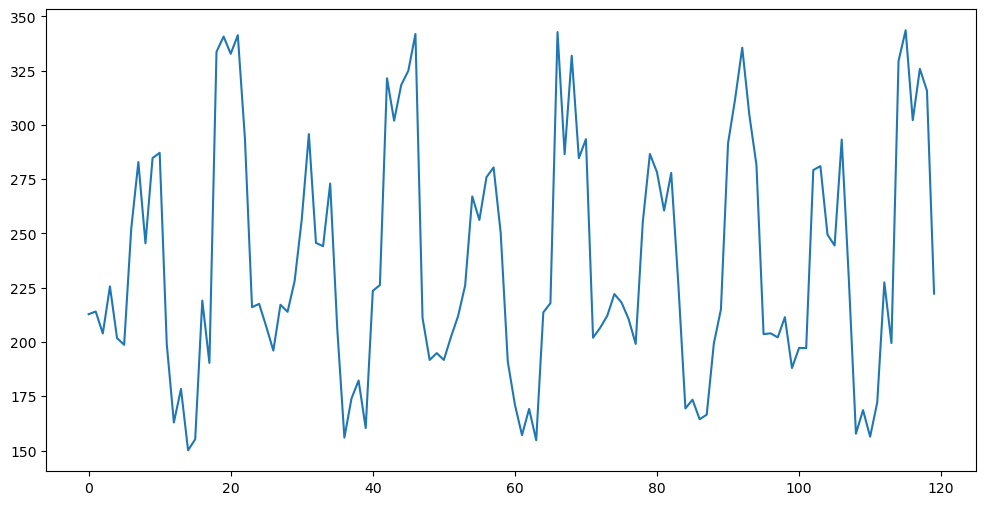

In [10]:
df['load'].head(120).plot(figsize=(12,6))

In [11]:
def get_temperature(date):

    month=date.month
    hour=date.hour
    
    if month in [12, 1, 2]:  # Winter
        if 0 <= hour < 6:
            return np.random.uniform(5, 10)  # Night
        elif 12 <= hour < 16:
            return np.random.uniform(15, 25)  # Day
        else:
            return np.random.uniform(10, 20)  # Morning/Evening
    elif month in [4, 5, 6]:  # Summer
        if 0 <= hour < 6:
            return np.random.uniform(28, 35)  # Night
        elif 12 <= hour < 16:
            return np.random.uniform(38, 45)  # Day
        else:
            return np.random.uniform(30, 38)  # Morning/Evening
    elif month in [7, 8, 9]:  # Monsoon
        if 0 <= hour < 6:
            return np.random.uniform(25, 30)  # Night
        elif 12 <= hour < 16:
            return np.random.uniform(30, 35)  # Day
        else:
            return np.random.uniform(25, 30)  # Morning/Evening
    else:  # Spring and Autumn
        if 0 <= hour < 6:
            return np.random.uniform(15, 20)  # Night
        elif 12 <= hour < 16:
            return np.random.uniform(25, 30)  # Day
        else:
            return np.random.uniform(20, 25)  # Morning/Evening

df['temperature'] = df['timestamp'].apply(get_temperature)

df.head()

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,6.726414,0,7.819507,212.808896,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,5.468334,0,0.886376,214.039654,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,8.465443,0,0.798470,203.938529,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,5.881264,0,3.067700,225.616968,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,7.316908,0,0.359479,201.800398,Normal Operation


In [12]:
df.head(24)

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,6.726414,0,7.819507,212.808896,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,5.468334,0,0.886376,214.039654,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,8.465443,0,0.798470,203.938529,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,5.881264,0,3.067700,225.616968,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,7.316908,0,0.359479,201.800398,Normal Operation
5,5,2023-01-01 05:00:00,6,5,1,8.574929,0,5.004297,198.722499,Normal Operation
6,6,2023-01-01 06:00:00,6,6,1,12.907687,0,269.964192,252.243751,Increased Renewable Energy Integration
7,7,2023-01-01 07:00:00,6,7,1,17.800435,0,286.037727,282.904896,Increased Renewable Energy Integration
8,8,2023-01-01 08:00:00,6,8,1,13.154761,0,64.654743,245.456082,Normal Operation
9,9,2023-01-01 09:00:00,6,9,1,11.394904,0,234.977178,284.735439,Increased Renewable Energy Integration


In [13]:
def assign_compensation_method(row):
    if row['is_holiday'] == 1:
        return 'Lower Power Supply'
    elif row['solar_generation'] > 200:
        return 'Increased Renewable Energy Integration'
    elif row['hour_of_day'] >= 18 and row['hour_of_day'] <= 22:
        return 'Peak Load Shifting'
    elif row['temperature'] > 35:
        return 'Increased Power Supply'
    else:
        return 'Normal Operation'

df['compensation_method'] = df.apply(assign_compensation_method, axis=1)

print(df[['timestamp', 'load', 'compensation_method']].head(10))


            timestamp        load                     compensation_method
0 2023-01-01 00:00:00  212.808896                        Normal Operation
1 2023-01-01 01:00:00  214.039654                        Normal Operation
2 2023-01-01 02:00:00  203.938529                        Normal Operation
3 2023-01-01 03:00:00  225.616968                        Normal Operation
4 2023-01-01 04:00:00  201.800398                        Normal Operation
5 2023-01-01 05:00:00  198.722499                        Normal Operation
6 2023-01-01 06:00:00  252.243751  Increased Renewable Energy Integration
7 2023-01-01 07:00:00  282.904896  Increased Renewable Energy Integration
8 2023-01-01 08:00:00  245.456082                        Normal Operation
9 2023-01-01 09:00:00  284.735439  Increased Renewable Energy Integration


In [172]:
df.to_csv('hourly completed.csv', index=False)

from IPython.display import FileLink

FileLink('hourly completed.csv')


C:\Users\ASUS\Desktop\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\hourly completed.csv

In [173]:
df=df[df['timestamp'].dt.year>=2023]

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [200]:
X = df[['temperature', 'solar_generation', 'hour_of_day', 'load', 'is_holiday']]
y=df['compensation_method']
X_reg = df[['temperature', 'solar_generation', 'hour_of_day', 'is_holiday']]
y_reg = df['load']
le = LabelEncoder()
y = le.fit_transform(y)

In [201]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [202]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

In [203]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [204]:
rf_clf=RandomForestClassifier(n_estimators=100, random_state=42)

In [205]:
rf_reg.fit(X_reg_train, y_reg_train)

RandomForestRegressor(random_state=42)

In [206]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [207]:
y_pred = rf_clf.predict(X_test)
class_accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Model Accuracy: {class_accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Make predictions on the test set for regression (peak supply)
y_reg_pred = rf_reg.predict(X_reg_test)
reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Regression Model Mean Squared Error: {reg_mse:.2f}")
print(confusion_matrix(y_test, y_pred))

Classification Model Accuracy: 1.00
                                        precision    recall  f1-score   support

                Increased Power Supply       1.00      1.00      1.00       107
Increased Renewable Energy Integration       1.00      1.00      1.00       559
                    Lower Power Supply       1.00      1.00      1.00        22
                      Normal Operation       1.00      1.00      1.00      1449
                    Peak Load Shifting       1.00      1.00      1.00       485

                              accuracy                           1.00      2622
                             macro avg       1.00      1.00      1.00      2622
                          weighted avg       1.00      1.00      1.00      2622

Regression Model Mean Squared Error: 962.86
[[ 107    0    0    0    0]
 [   0  559    0    0    0]
 [   0    0   22    0    0]
 [   0    0    0 1449    0]
 [   0    0    0    0  485]]


In [183]:
new_data_class = pd.DataFrame({
    'temperature': [36],  
    'solar_generation': [400], 
    'hour_of_day': [10], 
    'load': [3200],
    'is_holiday': [0]  
})

new_data_reg = pd.DataFrame({
    'temperature': [36],
    'solar_generation': [400],  
    'hour_of_day': [10], 
    'is_holiday': [0]  
})
predicted_class_label = rf_clf.predict(new_data_class)
predicted_compensation_method = le.inverse_transform(predicted_class_label)

predicted_peak_supply = rf_reg.predict(new_data_reg)

print(f"Prediction for 2023-01-26 Compensation Method: {predicted_compensation_method[0]}")
print(f"Prediction for 2023-01-26 Peak Supply Needed: {predicted_peak_supply[0]:.2f} MW")

Prediction for 2023-01-26 Compensation Method: Increased Renewable Energy Integration
Prediction for 2023-01-26 Peak Supply Needed: 394.54 MW


In [184]:
def predict_for_date(date, temperature, solar_generation, hour_of_day, is_holiday, rf_clf, rf_reg, le):
    # Prepare the data for the classifier (compensation method)
    new_data_class = pd.DataFrame({
        'temperature': [temperature],
        'solar_generation': [solar_generation],
        'hour_of_day': [hour_of_day],
        'load': [0],
        'is_holiday': [is_holiday]
    })

    # Prepare the data for the regressor (peak supply)
    new_data_reg = pd.DataFrame({
        'temperature': [temperature],
        'solar_generation': [solar_generation],
        'hour_of_day': [hour_of_day],
        'is_holiday': [is_holiday]
    })

    predicted_class_label = rf_clf.predict(new_data_class)
    predicted_compensation_method = le.inverse_transform(predicted_class_label)

    predicted_peak_supply = rf_reg.predict(new_data_reg)

    print(f"Prediction for {date}:")
    print(f"Compensation Method: {predicted_compensation_method[0]}")
    print(f"Peak Supply Needed: {predicted_peak_supply[0]:.2f} MW")




In [185]:
date = '2023-12-23'
temperature = 35  
solar_generation = 20
hour_of_day = 9
is_holiday = 0

predict_for_date(date, temperature, solar_generation, hour_of_day, is_holiday, rf_clf, rf_reg, le)

Prediction for 2023-12-23:
Compensation Method: Normal Operation
Peak Supply Needed: 332.16 MW


In [186]:
def predict_next_day_load(date,hour, temperature, solar_generation, is_holiday, rf_reg):
    hourly_load_predictions = []

    for hour in range(24):
        new_data = pd.DataFrame({
            'temperature': [temperature],
            'solar_generation': [solar_generation],
            'hour_of_day': [hour],
            'is_holiday': [is_holiday]
        })

        predicted_load = rf_reg.predict(new_data)[0]
        hourly_load_predictions.append(predicted_load)

    return hourly_load_predictions



In [195]:
date = '2024-05-26' 
temperature = 42 
solar_generation = 300
is_holiday = 0
hour=15

hourly_load_predictions = predict_next_day_load(date,hour, temperature, solar_generation, is_holiday, rf_reg)

hours = np.arange(24) 



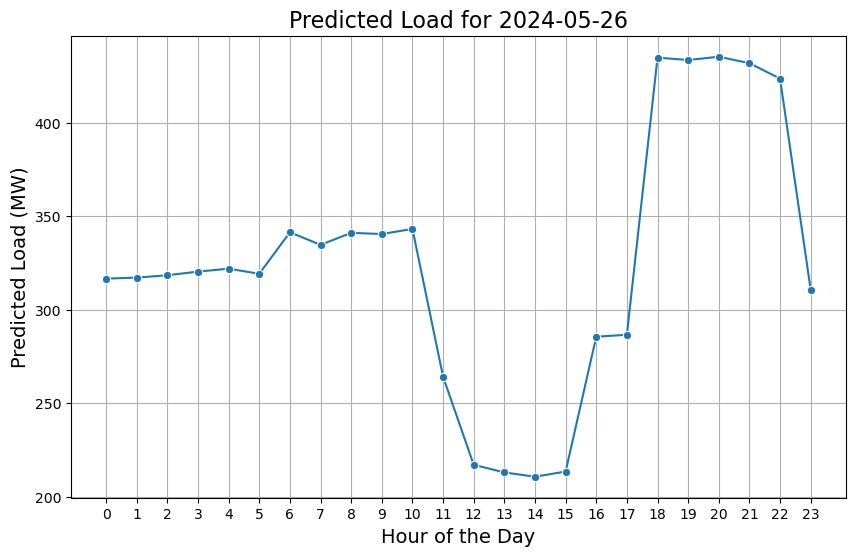

In [196]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=hours, y=hourly_load_predictions, marker='o')

plt.title(f'Predicted Load for {date}', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Predicted Load (MW)', fontsize=14)
plt.xticks(hours)  
plt.grid(True)

plt.show()


In [194]:
def predict_for_date(date, temperature, solar_generation, hour_of_day, is_holiday, rf_clf, rf_reg, le):
    new_data_class = pd.DataFrame({
        'temperature': [temperature],
        'solar_generation': [solar_generation],
        'hour_of_day': [hour_of_day],
        'load': [0],
        'is_holiday': [is_holiday]
    })

    new_data_reg = pd.DataFrame({
        'temperature': [temperature],
        'solar_generation': [solar_generation],
        'hour_of_day': [hour_of_day],
        'is_holiday': [is_holiday]
    })
    
    predicted_class_label = rf_clf.predict(new_data_class)
    predicted_compensation_method = le.inverse_transform(predicted_class_label)
    predicted_peak_supply = rf_reg.predict(new_data_reg)

    return {
        'date': date,
        'hour_of_day': hour_of_day,
        'compensation_method': predicted_compensation_method[0],
        'peak_supply_needed': predicted_peak_supply[0]
    }

def generate_24_hour_predictions(date, temperature, solar_generation, is_holiday, rf_clf, rf_reg, le):

    results = []

    for hour in range(24):
        prediction = predict_for_date(date, temperature, solar_generation, hour, is_holiday, rf_clf, rf_reg, le)
        results.append(prediction)
    
    df_predictions = pd.DataFrame(results)
    
    return df_predictions

date = '2024-05-17'
temperature = 42
solar_generation = 300
is_holiday = 0


df_24_hour_predictions = generate_24_hour_predictions(date, temperature, solar_generation, is_holiday, rf_clf, rf_reg, le)

print(df_24_hour_predictions)


          date  hour_of_day                     compensation_method  \
0   2024-05-17            0  Increased Renewable Energy Integration   
1   2024-05-17            1  Increased Renewable Energy Integration   
2   2024-05-17            2  Increased Renewable Energy Integration   
3   2024-05-17            3  Increased Renewable Energy Integration   
4   2024-05-17            4  Increased Renewable Energy Integration   
5   2024-05-17            5  Increased Renewable Energy Integration   
6   2024-05-17            6  Increased Renewable Energy Integration   
7   2024-05-17            7  Increased Renewable Energy Integration   
8   2024-05-17            8  Increased Renewable Energy Integration   
9   2024-05-17            9  Increased Renewable Energy Integration   
10  2024-05-17           10  Increased Renewable Energy Integration   
11  2024-05-17           11  Increased Renewable Energy Integration   
12  2024-05-17           12  Increased Renewable Energy Integration   
13  20

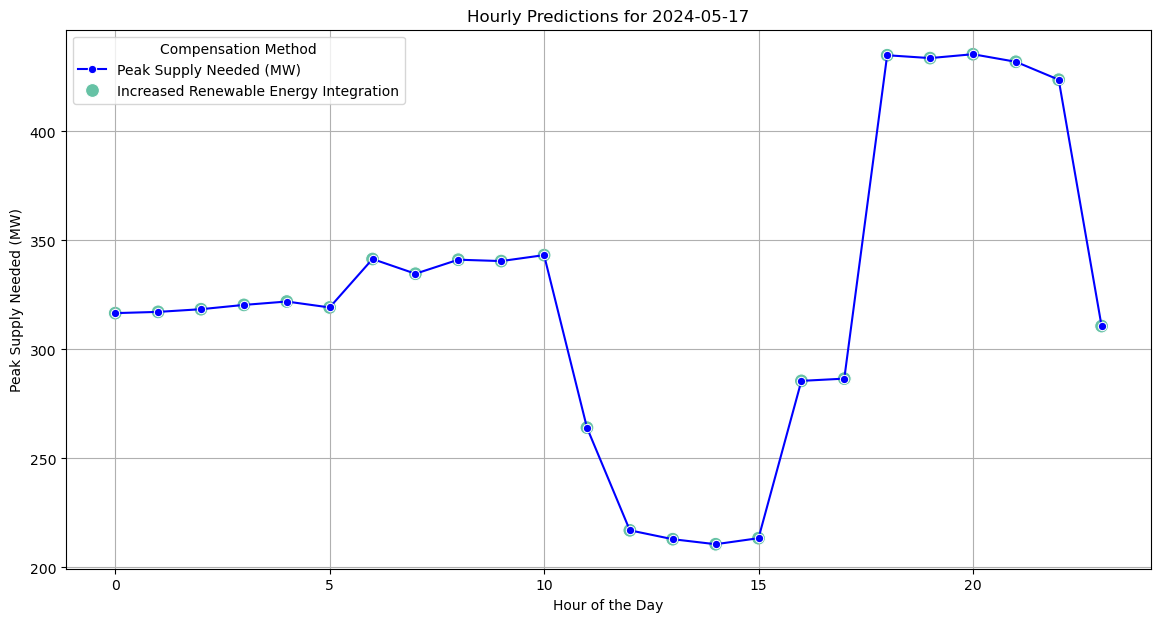

In [198]:
def plot_predictions(df_predictions):
    plt.figure(figsize=(14, 7))

    sns.lineplot(data=df_predictions, x='hour_of_day', y='peak_supply_needed', marker='o', color='blue', label='Peak Supply Needed (MW)')
    
    sns.scatterplot(data=df_predictions, x='hour_of_day', y='peak_supply_needed', hue='compensation_method', palette='Set2', s=100, legend='full', marker='o')

    plt.title('Hourly Predictions for {}'.format(df_predictions['date'][0]))
    plt.xlabel('Hour of the Day')
    plt.ylabel('Peak Supply Needed (MW)')
    plt.legend(title='Compensation Method')
    plt.grid(True)
    plt.show()

plot_predictions(df_24_hour_predictions)